In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
G = .01
M = 500.
m = .1
dt = .001

In [3]:
def force(r):
    """
    Computes the force at a given position.
    
    Args:
        r: array of shape (2,), position
        
    Returns:
        array of shape (2,), force at a given position
    """
    return ((-G*M*m) / np.power(np.dot(r, r), 3/2.)) * r

def potential(r):
    """
    Computes the potential energy at a given position.
    
    Args:
        r: array of shape (2, -1), position
        
    Returns:
        array of shape (-1,), potential at a given position
    """
    return (-G*M*m) / np.linalg.norm(r, axis=1)

def kinetic(p):
    """
    Computes the potential energy at a given position.
    
    Args:
        p: array of shape (2, -1), momentum
        
    Returns:
        array of shape (-1,), kinetic energy
    """
    return np.square(np.linalg.norm(momentums, axis=1)) / (2*m)

def energy(p, r):
    return potential(r) + kinetic(p)

In [4]:
class Particle:
    """
    Holds information about the simulated body.
    
    Args:
        r0: array, initial position
        p0: array, initial momentum
        mode: string or None, chosen simulation mode
    """
    
    def __init__(self, r0, p0):
        self.r0 = r0
        self.position = np.copy(r0)
        
        self.t = 0.

        # For Euler
        self.p0 = p0
        self.momentum = np.copy(p0)       
        
        # For Verlet
        self.pos_prev = self.r0 - (self.p0 / m) * dt
        
        # For Leapfrog
        F = force(self.p0)
        self.v = (self.p0/m) - (0.5 * F * dt) / m
            
        
    def evolve_euler(self):
        """
        Performs a position and momentum update according to the Euler's algorithm.
        """
        self.t += dt
        F = force(self.position)
        
        self.position += (self.momentum / m) * dt + (.5 * (F / m)) * dt**2
        self.momentum += F * dt
    
    def evolve_verlet(self):
        """
        Performs a position update according to the Verlet's algorithm.
        """
        self.t += dt
        F = force(self.position)
        
        r_new = 2*self.position - self.pos_prev + ((F/m) * dt**2)
        
        self.momentum = (m*(r_new - self.pos_prev)) / (2*dt)
        
        self.pos_prev = np.copy(self.position)
        self.position = np.copy(r_new)

        
    def evolve_frog(self):
        """Preforms a position update according to the leapfrog algorithm."""
        self.t += dt
        F = force(self.position)
        
        v_new = self.v + (F/m) * dt
        self.momentum = (m*(self.v + v_new)) / 2.
        self.v = v_new
        self.position += self.v * dt
    
    
    def __str__(self):
        return "Particle(" + str(self.position) + ", " + str(self.momentum) + ")"
    
    def __repr__(self):
        return "Particle(" + str(self.position) + ", " + str(self.momentum) + ")"

# Euler's algorithm

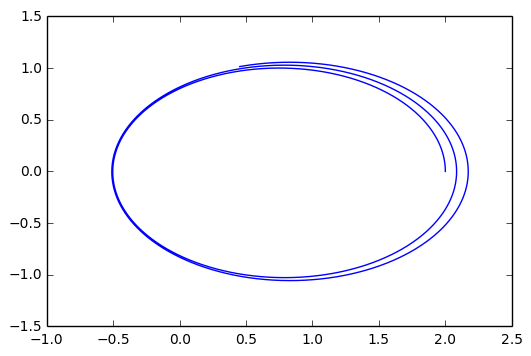

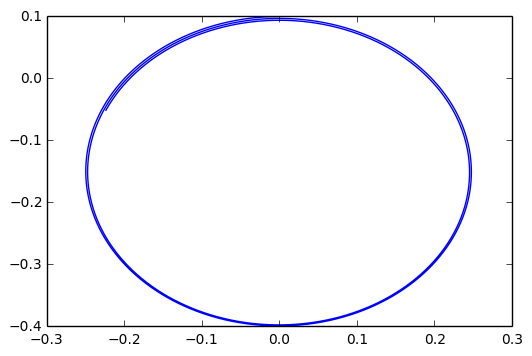

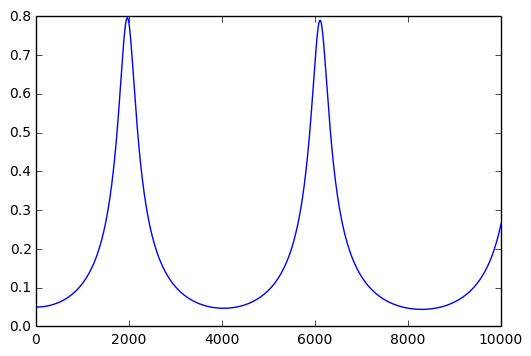

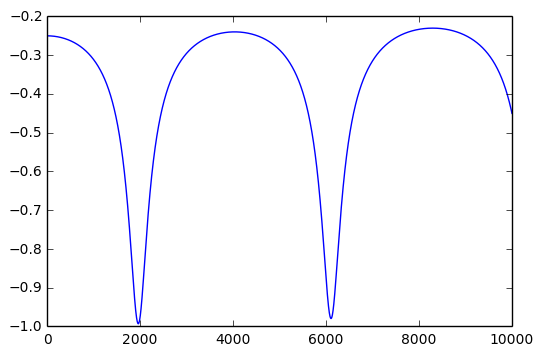

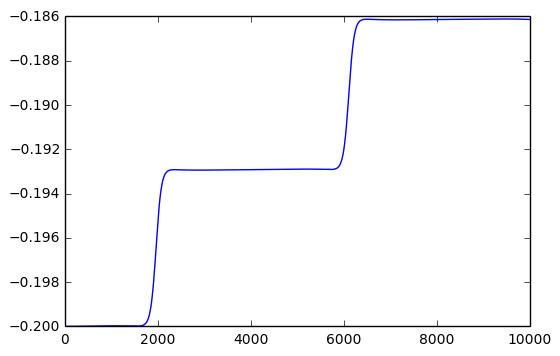

CPU times: user 1.36 s, sys: 6.15 ms, total: 1.37 s
Wall time: 1.36 s


In [5]:
%%time

r = np.array([
        2., # X
        0., # Y
    ])

p = np.array([
        0,
        0.1,
    ])

body = Particle(r, p)

locations = np.array([r])
momentums = np.array([p])

for i in range(10000):
    body.evolve_euler()
    pos, mom = np.copy(body.position), np.copy(body.momentum)
    locations = np.vstack((locations, pos))
    momentums = np.vstack((momentums, mom))
    

plt.plot(locations[:,0], locations[:,1])
plt.show()

plt.plot(momentums[:,0], momentums[:,1])
plt.show()

T, V, E = kinetic(momentums), potential(locations), energy(momentums, locations)

plt.plot(T)
plt.show()

plt.plot(V)
plt.show()

plt.plot(E)
plt.show()

# Verlet's algorithm

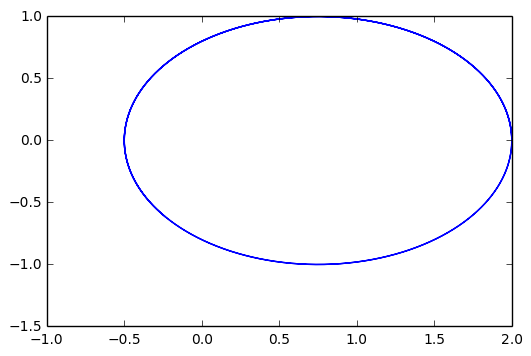

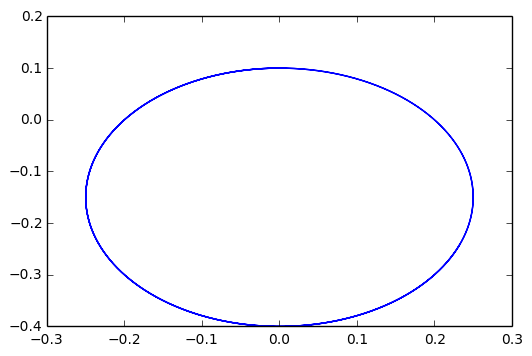

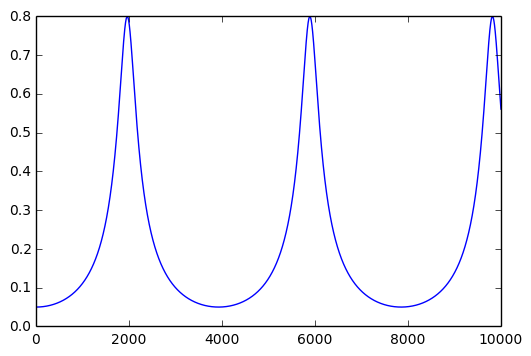

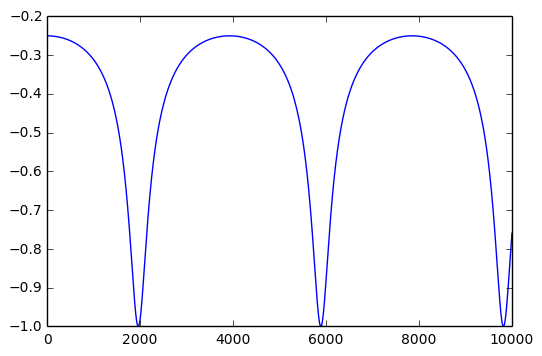

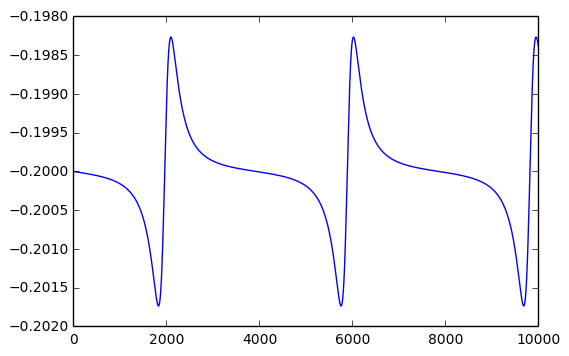

CPU times: user 1.3 s, sys: 6.21 ms, total: 1.3 s
Wall time: 1.29 s


In [6]:
%%time

r = np.array([
        2., # X
        0., # Y
    ])

p = np.array([
        0,
        0.1,
    ])

body = Particle(r, p)

locations = np.array([r])
momentums = np.array([p])

for i in range(10000):
    body.evolve_verlet()
    pos, mom = np.copy(body.position), np.copy(body.momentum)
    locations = np.vstack((locations, pos))
    momentums = np.vstack((momentums, mom))
    

plt.plot(locations[:,0], locations[:,1])
plt.show()

plt.plot(momentums[:,0], momentums[:,1])
plt.show()

T, V, E = kinetic(momentums), potential(locations), energy(momentums, locations)

plt.plot(T)
plt.show()

plt.plot(V)
plt.show()

plt.plot(E)
plt.show()

# Leapfrog algorithm

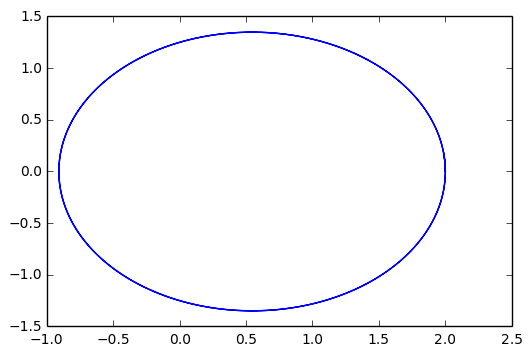

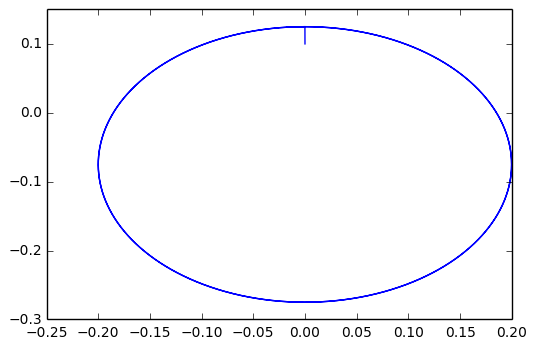

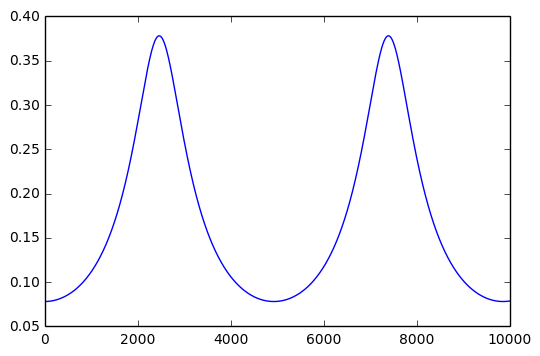

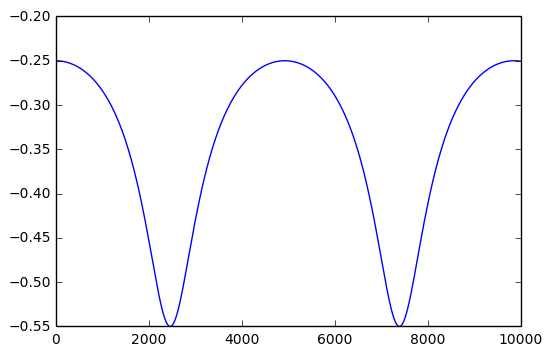

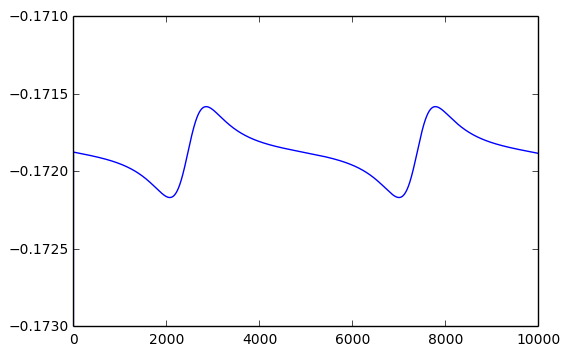

CPU times: user 1.26 s, sys: 2.99 ms, total: 1.26 s
Wall time: 1.25 s


In [9]:
%%time

r = np.array([
        2., # X
        0., # Y
    ])

p = np.array([
        0,
        0.1,
    ])

body = Particle(r, p)

locations = np.array([r])
momentums = np.array([p])

for i in range(10000):
    body.evolve_frog()
    pos, mom = np.copy(body.position), np.copy(body.momentum)
    locations = np.vstack((locations, pos))
    momentums = np.vstack((momentums, mom))
    

plt.plot(locations[:,0], locations[:,1])
plt.show()

plt.plot(momentums[:,0], momentums[:,1])
plt.show()

T, V, E = kinetic(momentums), potential(locations), energy(momentums, locations)

plt.plot(T)
plt.show()

plt.plot(V)
plt.show()
plt.ylim(-0.173, -0.171)
plt.plot(E)
plt.show()

# Chenciner

In [10]:
r1 = np.array([0.97000436, -0.24308753])
r2 = -r1
r3 = np.array([0., 0.])

v1 = np.array([0.93240737, 0.86473146])
v2 = np.copy(v1)
v3 = -2*v1